In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/Users/pravinjadhav/Desktop/Pravin/fuel price optimizer/data/oil_retail_history.csv', parse_dates=['date']).sort_values('date')
df.head()


,date,price,cost,comp1_price,comp2_price,comp3_price,volume
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         730 non-null    datetime64[ns]
 1   price        730 non-null    float64       
 2   cost         730 non-null    float64       
 3   comp1_price  730 non-null    float64       
 4   comp2_price  730 non-null    float64       
 5   comp3_price  730 non-null    float64       
 6   volume       730 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.1 KB


,date,price,cost,comp1_price,comp2_price,comp3_price,volume
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2023-12-31 12:00:00,96.505301,86.498178,96.551658,96.530068,96.457260,13960.983562
min,2023-01-01 00:00:00,88.080000,83.340000,88.320000,87.070000,86.080000,11397.000000
25%,2023-07-02 06:00:00,94.670000,85.302500,94.555000,94.827500,94.712500,13326.250000
50%,2023-12-31 12:00:00,96.525000,86.255000,96.590000,96.430000,96.515000,13882.000000
75%,2024-06-30 18:00:00,98.420000,87.610000,98.467500,98.447500,98.097500,14538.750000
max,2024-12-30 00:00:00,104.890000,91.860000,104.200000,105.000000,104.360000,16890.000000
std,NaN,2.747598,1.575689,2.779654,2.796763,2.782295,905.912360


Timeseries plots:

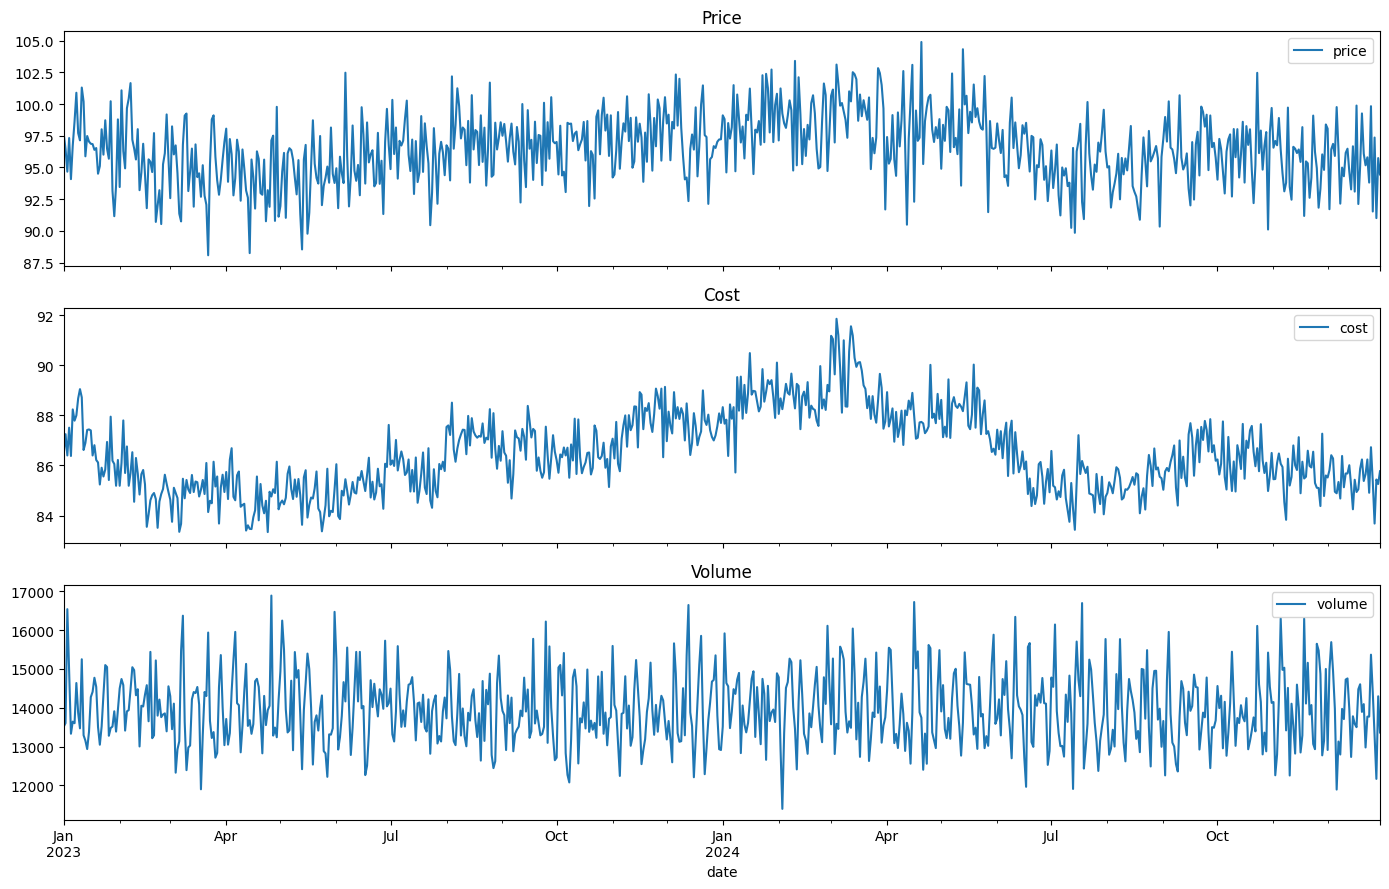

In [5]:
fig, ax = plt.subplots(3,1, figsize=(14,9), sharex=True)
df.plot(x='date', y='price', ax=ax[0], title='Price')
df.plot(x='date', y='cost', ax=ax[1], title='Cost')
df.plot(x='date', y='volume', ax=ax[2], title='Volume')
plt.tight_layout()


Competitor mean and price-gap scatter:

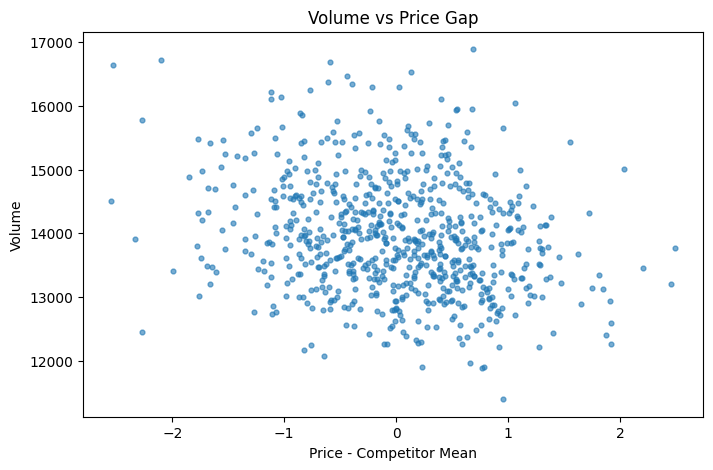

In [6]:
comp_cols = [c for c in df.columns if c.lower().startswith('comp')]
df['comp_mean'] = df[comp_cols].mean(axis=1)
df['price_diff'] = df['price'] - df['comp_mean']
plt.figure(figsize=(8,5))
plt.scatter(df['price_diff'], df['volume'], s=12, alpha=0.6)
plt.xlabel('Price - Competitor Mean')
plt.ylabel('Volume')
plt.title('Volume vs Price Gap')
plt.show()


Seasonal decomposition of volume (weekly):

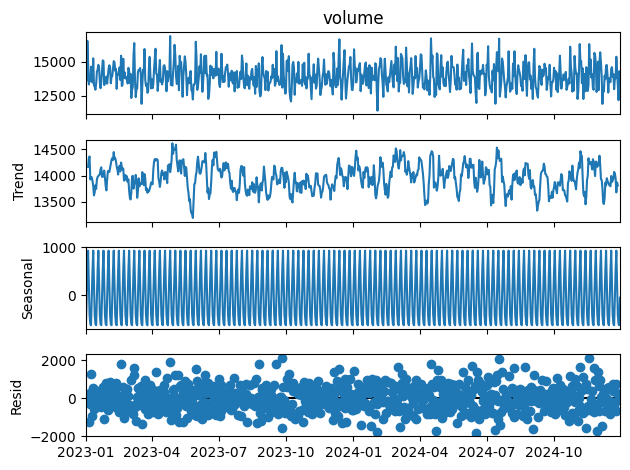

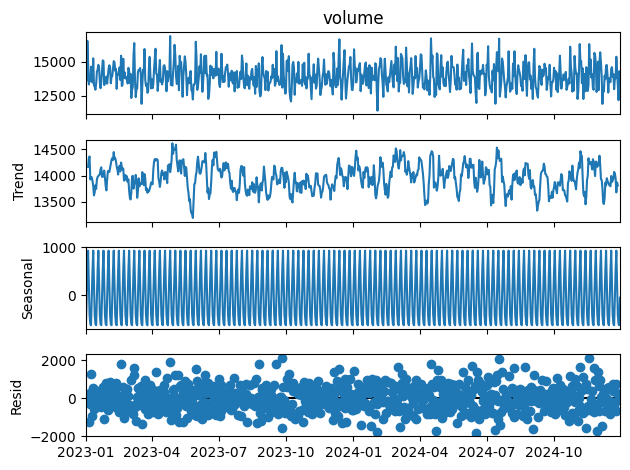

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df.set_index('date')['volume'].asfreq('D').interpolate()
res = seasonal_decompose(series, model='additive', period=7)
res.plot()


Elasticity quick check (log-log):

In [8]:
import numpy as np
import statsmodels.api as sm
mask = (df['price']>0) & (df['volume']>0)
X = sm.add_constant(np.log(df.loc[mask,'price']))
y = np.log(df.loc[mask,'volume'])
res = sm.OLS(y, X).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.072
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.301
Time:                        09:15:52   Log-Likelihood:                 967.93
No. Observations:                 730   AIC:                            -1932.
Df Residuals:                     728   BIC:                            -1923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9373      0.382     26.022      0.0

Feature engineering (use data_pipeline):

In [9]:
from src.data_pipeline import clean, compute_base_features, save_processed
cleaned = clean(df)
df_feat = compute_base_features(cleaned)
df_feat.head()
# Save processed for modeling
import os
os.makedirs('data/processed', exist_ok=True)
df_feat.to_parquet('data/processed/processed.parquet', index=False)


ModuleNotFoundError: No module named 'src'

In [1]:
print("hi")

hi
